In [35]:
#import necessary packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns

In [36]:
election = pd.read_csv("C:\\Users\\ashle\\MSDS692\\County election results.csv")

In [49]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   County                  3223 non-null   object 
 1   Race                    3223 non-null   object 
 2   Candidate               3223 non-null   object 
 3   Party                   1640 non-null   object 
 4   Votes                   3223 non-null   int64  
 5   PercentageOfTotalVotes  3223 non-null   float64
 6   JurisdictionName        3223 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 176.4+ KB


In [38]:
# drop columns that aren't needed
elct2 = election.drop('Candidate', axis = 1)
elct3 = elct2.drop('JurisdictionName', axis = 1)
elct3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   County                  3223 non-null   object 
 1   Race                    3223 non-null   object 
 2   Party                   1640 non-null   object 
 3   Votes                   3223 non-null   int64  
 4   PercentageOfTotalVotes  3223 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 126.0+ KB


In [42]:
# keep only rows with the winner of the most votes in the presidential race 
logical_index = elct3["Race"] == "United States President/Vice President"
logical_index2 = elct3["PercentageOfTotalVotes"] > 46.3 
elct4 = elct3[logical_index & logical_index2]
elct4

,County,Race,Party,Votes,PercentageOfTotalVotes
19,Adams,United States President/Vice President,Republican Party Nominees,3083,66.3867
92,Asotin,United States President/Vice President,Republican Party Nominees,5741,58.9667
160,Benton,United States President/Vice President,Republican Party Nominees,47194,58.9726
241,Chelan,United States President/Vice President,Republican Party Nominees,18114,54.2660
315,Clallam,United States President/Vice President,Republican Party Nominees,18794,47.6316
384,Clark,United States President/Vice President,Democratic Party Nominees,92757,46.3414
478,Columbia,United States President/Vice President,Republican Party Nominees,1497,68.6068
547,Cowlitz,United States President/Vice President,Republican Party Nominees,24185,52.9305
634,Douglas,United States President/Vice President,Republican Party Nominees,9603,61.7834
712,Ferry,United States President/Vice President,Republican Party Nominees,2202,61.1497


In [45]:
# drop the rest of the columns that aren't needed 
elct5 = elct4.drop('Race', axis = 1)
elct6 = elct5.drop('Votes', axis = 1)
elct7 = elct6.drop('PercentageOfTotalVotes', axis = 1)
elct7

,County,Party
19,Adams,Republican Party Nominees
92,Asotin,Republican Party Nominees
160,Benton,Republican Party Nominees
241,Chelan,Republican Party Nominees
315,Clallam,Republican Party Nominees
384,Clark,Democratic Party Nominees
478,Columbia,Republican Party Nominees
547,Cowlitz,Republican Party Nominees
634,Douglas,Republican Party Nominees
712,Ferry,Republican Party Nominees


In [46]:
# change the party to a binary 
elct7['Party'] = preprocessing.LabelEncoder().fit_transform(elct7.Party.values)

In [83]:
elct7.reset_index(inplace = True, drop = True)
elct7.head()

,County,Party
0,Adams,1
1,Asotin,1
2,Benton,1
3,Chelan,1
4,Clallam,1


In [92]:
covid = pd.read_csv("C:\\Users\\ashle\\MSDS692\\COVID-19_Vaccinations_in_the_United_States_County.csv")
covid

,Recip_County,Series_Complete_Pop_Pct
0,Adams County,56.0
1,Asotin County,40.0
2,Benton County,54.4
3,Chelan County,68.2
4,Clallam County,66.2
5,Clark County,61.9
6,Columbia County,45.2
7,Cowlitz County,56.5
8,Douglas County,59.5
9,Ferry County,54.0


In [93]:
covid.drop([34], inplace = True)
covid

,Recip_County,Series_Complete_Pop_Pct
0,Adams County,56.0
1,Asotin County,40.0
2,Benton County,54.4
3,Chelan County,68.2
4,Clallam County,66.2
5,Clark County,61.9
6,Columbia County,45.2
7,Cowlitz County,56.5
8,Douglas County,59.5
9,Ferry County,54.0


In [94]:
covid.reset_index(inplace = True, drop = True)
covid

,Recip_County,Series_Complete_Pop_Pct
0,Adams County,56.0
1,Asotin County,40.0
2,Benton County,54.4
3,Chelan County,68.2
4,Clallam County,66.2
5,Clark County,61.9
6,Columbia County,45.2
7,Cowlitz County,56.5
8,Douglas County,59.5
9,Ferry County,54.0


In [95]:
# combine the covid vaccination data and the election results data
df = pd.concat([elct7, covid['Series_Complete_Pop_Pct']], axis = 1)

In [96]:
df

,County,Party,Series_Complete_Pop_Pct
0,Adams,1,56.0
1,Asotin,1,40.0
2,Benton,1,54.4
3,Chelan,1,68.2
4,Clallam,1,66.2
5,Clark,0,61.9
6,Columbia,1,45.2
7,Cowlitz,1,56.5
8,Douglas,1,59.5
9,Ferry,1,54.0


In [98]:
student = pd.read_csv("C:\\Users\\ashle\\MSDS692\\All_students__kindergarten_through_12th_grade__immunization_data_by_school__2015-2016 (version 1).csv")

In [99]:
student.head()

,Percent_complete_for_all_immunizations,County
0,67.8,SNOHOMISH
1,40.5,CLARK
2,91.1,THURSTON
3,92.3,GRAYS HARBOR
4,96.9,CHELAN


In [103]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Percent_complete_for_all_immunizations  2494 non-null   float64
 1   County                                  2607 non-null   object 
dtypes: float64(1), object(1)
memory usage: 40.9+ KB


In [105]:
# combine the all schools immunization percentages by average
aggregation_functions = {'Percent_complete_for_all_immunizations': 'mean'}
student2 = student.groupby(student['County']).aggregate(aggregation_functions)

In [106]:
student2

,Percent_complete_for_all_immunizations
County,
ADAMS,88.444444
ASOTIN,92.625000
BENTON,92.458182
CHELAN,91.070270
CLALLAM,78.192857
CLARK,79.617857
COLUMBIA,81.850000
COWLITZ,84.844444
DOUGLAS,88.338889


In [109]:
student2.reset_index(inplace = True, drop = True)
student2

,Percent_complete_for_all_immunizations
0,88.444444
1,92.625000
2,92.458182
3,91.070270
4,78.192857
5,79.617857
6,81.850000
7,84.844444
8,88.338889
9,85.090000


In [110]:
# add the student immunization percentages to the dataframe with the covid vaccination and county election results
df2 = pd.concat([df, student2['Percent_complete_for_all_immunizations']], axis = 1)
df2

,County,Party,Series_Complete_Pop_Pct,Percent_complete_for_all_immunizations
0,Adams,1,56.0,88.444444
1,Asotin,1,40.0,92.625000
2,Benton,1,54.4,92.458182
3,Chelan,1,68.2,91.070270
4,Clallam,1,66.2,78.192857
5,Clark,0,61.9,79.617857
6,Columbia,1,45.2,81.850000
7,Cowlitz,1,56.5,84.844444
8,Douglas,1,59.5,88.338889
9,Ferry,1,54.0,85.090000


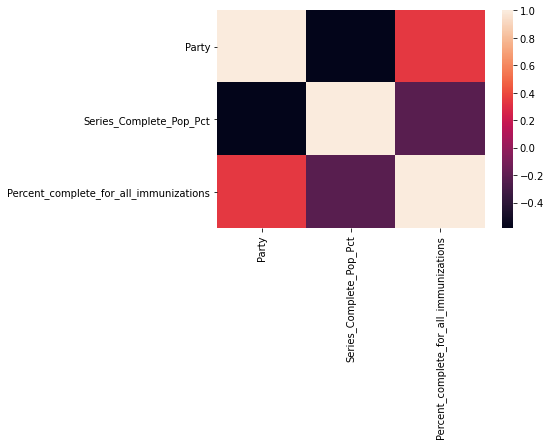

In [111]:
# preliminary correlation observations
_ = sns.heatmap(df2.corr())

In [124]:
df2.drop('County', axis= 1, inplace = True)

In [139]:
#set up target and feature columns
cols = df2.columns
target = 'Party'
feat = [c for c in cols if c != target]

X = df2[feat].values
y = df2[target].values

In [140]:
#setting up the training and testing set with an 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
#setting the model up with 2 groups initially
model = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [155]:
preds = model.predict(X_test)

print('Differences between the actual and predicted values')
print(y_test - preds)

Differences between the actual and predicted values
[ 0  0  0  0  0  0  0  0  0  0 -1  0]


In [156]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [157]:
print(confusion_matrix(y_test, preds))

[[4 1]
 [0 7]]


In [158]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.88      1.00      0.93         7

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



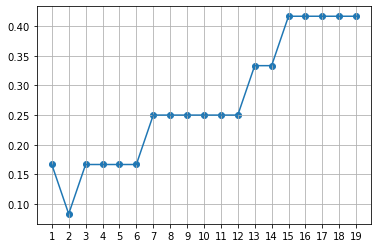

In [164]:
# check the error rate to number of groups 
error_rate = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))
    
plt.plot(range(1,20), error_rate)
plt.scatter(range(1,20), error_rate)
plt.grid()
_ = plt.xticks(range(1,20))

In [167]:
from sklearn import tree

In [170]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
preds = tree_model.predict(X_test)

In [171]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[1 1 0 1 0 1 0 1 1 0 0 1]
Predictions for test data set
[1 1 0 1 1 1 0 1 1 1 1 1]


1    7
0    5
dtype: int64


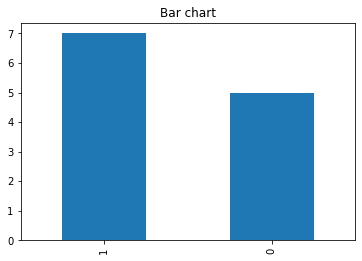

In [172]:
test_by_quality=pd.value_counts(y_test, sort= True)
test_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_quality)

1    10
0     2
dtype: int64


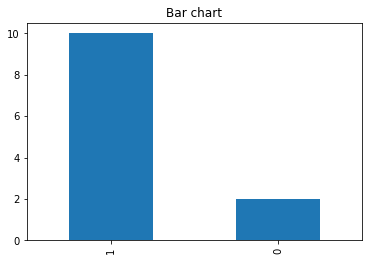

In [173]:
preds_by_quality=pd.value_counts(preds, sort= True)
preds_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_quality)

In [174]:
print(accuracy_score(y_test,preds))

0.75


In [177]:
# determine which feature had the mostt weight on determining party
importance_list = list(zip(feat,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Series_Complete_Pop_Pct', 0.8553571428571429),
 ('Percent_complete_for_all_immunizations', 0.14464285714285713)]

In [189]:
# save county elections to computer as well as the df2 dataframe
elct7.to_excel("C:\\Users\\ashle\\MSDS692\\electionresults.xlsx")

In [188]:
df2.to_excel("C:\\Users\\ashle\\MSDS692\\final dataframe.xlsx")